## Final Project Submission

* Student name: **John Lengu NKakuyia**
* Student pace: **part time** 
* Scheduled project review date/time:**5 Nov 2023** 
* Instructor name: **Veronica Isiaho**
* Blog post URL: [GitHub](https://github.com/JohnNkakuyia)


# Data-Driven Film Selection for Microsoft's Movie Studio

## Overview

This project revolves around leveraging data and analytics of the data link, to identify the most profitable film genres, which will enable Microsoft to strategically position its new movie studio for success in the highly competitive film industry.


## Business Problem Statement:

The objective is to leverage this research to provide actionable insights to the leadership of Microsoft's new movie studio, so that they may make informed decisions regarding the selection of film genres for production.


## Data

Data used in this analysis

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [The MovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

### Import Packages and modules 

In [1]:
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 1ACD-6683

 Directory of C:\Users\johnn\Documents\Flatiron\Phase_one_project\Data-Driven-Film-Selection

11/05/2023  06:51 PM    <DIR>          .
11/05/2023  06:51 PM    <DIR>          ..
11/02/2023  06:49 PM               140 .canvas
11/02/2023  06:49 PM                80 .gitignore
11/05/2023  06:48 PM    <DIR>          .ipynb_checkpoints
11/02/2023  06:49 PM         1,425,341 awesome.gif
11/02/2023  03:54 PM            53,544 bom.movie_gross.csv.gz
11/02/2023  06:49 PM             1,846 CONTRIBUTING.md
11/05/2023  06:51 PM           475,686 Data-Driven Film Selection for Microsoft's Movie Studio.ipynb
11/02/2023  08:10 PM         3,459,897 imdb.title.basics.csv.gz
11/02/2023  08:09 PM           539,530 imdb.title.ratings.csv.gz
11/02/2023  06:49 PM             1,357 LICENSE.md
11/05/2023  01:48 PM           217,714 microsoft.png.jpg
11/05/2023  03:00 PM           375,025 notebook.pdf.pdf
11/05/2023  03:15 PM           497,703

### loading Data

In [3]:
# reading data sets  
df_bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
df_imdb_basics = pd.read_csv('imdb.title.basics.csv.gz')
df_imdb_ratings = pd.read_csv('imdb.title.ratings.csv.gz')


### Data exploration

Exploring first 5 **rows**, **shape**, **columns** and **data overview**

In [4]:
#First 5 rows of each df
print(df_bom_movie_gross.head())
print(df_imdb_basics.head())
print(df_imdb_ratings.head())


                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wanderi

In [5]:
# checking the number of columns and rows on each dataframe
print(f'the bom.movie_gross.csv.gz has {df_bom_movie_gross.shape}rows and columns respectively' )
print()
print(f'the imdb.title.basics.csv.gz has {df_imdb_basics.shape}rows and columns respectively' )
print()
print(f'the imdb.title.ratings.csv.gz has {df_imdb_ratings.shape}rows and columns respectively' )


the bom.movie_gross.csv.gz has (3387, 5)rows and columns respectively

the imdb.title.basics.csv.gz has (146144, 6)rows and columns respectively

the imdb.title.ratings.csv.gz has (73856, 3)rows and columns respectively


In [6]:
# checking the overview of each imdab
print(f' this is the overview of imdb.title.basics.csv.gz {df_imdb_basics.info()}')
print()
print(f' this is the overview of imdb.title.ratings.csv.gz {df_imdb_ratings.info()}')
print()
print(f' this is the overview of bom.movie_gross.csv.gz {df_bom_movie_gross.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
 this is the overview of imdb.title.basics.csv.gz None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
 this 

In [7]:
# getting the columns name for each data frame
print(f' columns of imdb.title.basics.csv.gz {df_imdb_basics.columns}')
print()
print(f' columns of imdb.title.ratings.csv.gz {df_imdb_ratings.columns}')
print()
print(f' columns of bom.movie_gross.csv.gz {df_bom_movie_gross.columns}')

 columns of imdb.title.basics.csv.gz Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

 columns of imdb.title.ratings.csv.gz Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

 columns of bom.movie_gross.csv.gz Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


from our dataframes we can see that we have `tconst` column  appearing on two dataframes `df_imdb_basics` and on `df_imdb_ratings` and there it is important if we check if the content is same

In [8]:
# exploring tconst column 
print(df_imdb_basics['tconst'])
print()
print(df_imdb_ratings['tconst'])

0         tt0063540
1         tt0066787
2         tt0069049
3         tt0069204
4         tt0100275
            ...    
146139    tt9916538
146140    tt9916622
146141    tt9916706
146142    tt9916730
146143    tt9916754
Name: tconst, Length: 146144, dtype: object

0        tt10356526
1        tt10384606
2         tt1042974
3         tt1043726
4         tt1060240
            ...    
73851     tt9805820
73852     tt9844256
73853     tt9851050
73854     tt9886934
73855     tt9894098
Name: tconst, Length: 73856, dtype: object


###  checking on missing values

In [9]:
# checking the total number of missing values 
print(df_bom_movie_gross.isna().sum())
print()
print(df_imdb_basics.isna().sum())
print()
print(df_imdb_ratings.isna().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

tconst           0
averagerating    0
numvotes         0
dtype: int64


In [10]:
# drop columns with missing value
df_bom_movie_gross.drop('foreign_gross', axis=1, inplace=True)
df_imdb_basics.drop('runtime_minutes', axis=1, inplace=True)


In [11]:
# drop rows with missing value
df_bom_movie_gross.dropna(inplace=True)
df_imdb_basics.dropna(inplace=True)

In [12]:
# confirm if we still have missing values 
print(df_bom_movie_gross.isna().sum())
print()
print(df_imdb_basics.isna().sum())
print()
print(df_imdb_ratings.isna().sum())

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

tconst            0
primary_title     0
original_title    0
start_year        0
genres            0
dtype: int64

tconst           0
averagerating    0
numvotes         0
dtype: int64


In [13]:
# checking number of rows and columns 
print(f'the bom.movie_gross.csv.gz has {df_bom_movie_gross.shape}rows and columns respectively' )
print()
print(f'the imdb.title.basics.csv.gz has {df_imdb_basics.shape}rows and columns respectively' )
print()
print(f'the imdb.title.ratings.csv.gz has {df_imdb_ratings.shape}rows and columns respectively' )


the bom.movie_gross.csv.gz has (3356, 4)rows and columns respectively

the imdb.title.basics.csv.gz has (140733, 5)rows and columns respectively

the imdb.title.ratings.csv.gz has (73856, 3)rows and columns respectively


In [14]:
# check for duplicates
print(df_bom_movie_gross.duplicated().value_counts())
print()
print(df_imdb_basics.duplicated().value_counts())
print()
print(df_imdb_ratings.duplicated().value_counts())

False    3356
Name: count, dtype: int64

False    140733
Name: count, dtype: int64

False    73856
Name: count, dtype: int64


### merge dataframes for analysis

In [15]:
# Merge df_imdb_basics and df_imdb_ratings on 'tconst'
df_merged = df_imdb_basics.merge(df_imdb_ratings, on='tconst', how='inner')

# Merge the merged DataFrame with df_bom_movie_gross on 'title'
df_combined = df_merged.merge(df_bom_movie_gross, left_on='primary_title', right_on='title', how='inner')
df_combined.head()


,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,year
0,tt0315642,Wazir,Wazir,2016,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,2016
1,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,2012
2,tt4339118,On the Road,On the Road,2014,Drama,6.0,6,On the Road,IFC,744000.0,2012
3,tt5647250,On the Road,On the Road,2016,Drama,5.7,127,On the Road,IFC,744000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,2013


In [16]:
# combined dataframe overview
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          2997 non-null   object 
 1   primary_title   2997 non-null   object 
 2   original_title  2997 non-null   object 
 3   start_year      2997 non-null   int64  
 4   genres          2997 non-null   object 
 5   averagerating   2997 non-null   float64
 6   numvotes        2997 non-null   int64  
 7   title           2997 non-null   object 
 8   studio          2997 non-null   object 
 9   domestic_gross  2997 non-null   float64
 10  year            2997 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 257.7+ KB


In [17]:
df_combined.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year', 'genres',
       'averagerating', 'numvotes', 'title', 'studio', 'domestic_gross',
       'year'],
      dtype='object')

In [18]:
# Convert 'tconst' to float and store it in a new column 'tconst_float'
df_combined['tconst_float'] = df_combined['tconst'].apply(lambda x: float(x[2:]))


In [19]:
# Drop the 'tconst' column from df_combined
df_combined = df_combined.drop('tconst', axis=1)

In [20]:
# statistical summary of the combined dataframe
df_combined.describe()

,start_year,averagerating,numvotes,domestic_gross,year,tconst_float
count,2997.000000,2997.000000,2.997000e+03,2.997000e+03,2997.000000,2.997000e+03
mean,2013.795128,6.460961,6.224251e+04,3.060446e+07,2014.088422,2.912243e+06
std,2.462415,1.009615,1.260159e+05,6.677623e+07,2.441271,1.778250e+06
min,2010.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000,3.156420e+05
25%,2012.000000,5.900000,2.221000e+03,1.380000e+05,2012.000000,1.608290e+06
50%,2014.000000,6.600000,1.338600e+04,2.000000e+06,2014.000000,2.277860e+06
75%,2016.000000,7.200000,6.530400e+04,3.240000e+07,2016.000000,3.896100e+06
max,2019.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000,1.007537e+07


### Data Analysis

In [21]:
# Create a DataFrame genre_df by splitting genres into a list from df_combined dataframe
df_combined['genres'] = df_combined['genres'].str.split(',')
genre_df = df_combined.explode('genres')
genre_df.head()


,primary_title,original_title,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,year,tconst_float
0,Wazir,Wazir,2016,Action,7.1,15378,Wazir,Relbig.,1100000.0,2016,315642.0
0,Wazir,Wazir,2016,Crime,7.1,15378,Wazir,Relbig.,1100000.0,2016,315642.0
0,Wazir,Wazir,2016,Drama,7.1,15378,Wazir,Relbig.,1100000.0,2016,315642.0
1,On the Road,On the Road,2012,Adventure,6.1,37886,On the Road,IFC,744000.0,2012,337692.0
1,On the Road,On the Road,2012,Drama,6.1,37886,On the Road,IFC,744000.0,2012,337692.0


In [22]:
# Calculate average ratings and domestic gross per genre
genre_stats = genre_df.groupby('genres').agg({
    'averagerating': 'mean',
    'domestic_gross': 'sum'
}).reset_index()
genre_stats.head()

,genres,averagerating,domestic_gross
0,Action,6.277031,3.805024e+10
1,Adventure,6.482151,4.170226e+10
2,Animation,6.698013,1.336972e+10
3,Biography,6.973333,5.849019e+09
4,Comedy,6.254496,3.155336e+10


In [23]:
genre_stats.columns

Index(['genres', 'averagerating', 'domestic_gross'], dtype='object')

In [24]:
# Sort genres by average rating
most_popular_genre = genre_stats.sort_values(by='averagerating', ascending=False).reset_index()
most_popular_genre.head()


,index,genres,averagerating,domestic_gross
0,6,Documentary,7.291928,2.912391e+09
1,15,News,7.100000,2.164140e+07
2,3,Biography,6.973333,5.849019e+09
3,10,History,6.883582,2.453510e+09
4,18,Sport,6.867925,2.115363e+09


**Genre Popularity:** we can see that the most popular genre is documentary with the highst average rating 

In [25]:
# Sort genres by domestic gross
high_domestic_gross_genre= genre_stats.sort_values(by='domestic_gross', ascending=False).reset_index()
high_domestic_gross_genre.head()


,index,genres,averagerating,domestic_gross
0,1,Adventure,6.482151,4.170226e+10
1,0,Action,6.277031,3.805024e+10
2,4,Comedy,6.254496,3.155336e+10
3,7,Drama,6.592546,2.868379e+10
4,17,Sci-Fi,6.458209,1.495340e+10


**Financial Success:** adventure is the highest in terms of domestic gross

Explore combinations of genres that have both high ratings and high gross and setting the threshold at 5.504562e+09

In [26]:
# Sort genres by average rating in descending order
genre_stats = genre_stats.sort_values(by='averagerating', ascending=False)

# Filter genres with a total domestic gross above a certain threshold
threshold = genre_stats['domestic_gross'].quantile(0.75) 
high_gross_genres = genre_stats[genre_stats['domestic_gross'] >= threshold]

# Display genres that have both high ratings and high gross
high_rated_high_gross_genres = high_gross_genres
high_rated_high_gross_genres.head()

,genres,averagerating,domestic_gross
7,Drama,6.592546,2.868379e+10
1,Adventure,6.482151,4.170226e+10
17,Sci-Fi,6.458209,1.495340e+10
0,Action,6.277031,3.805024e+10
4,Comedy,6.254496,3.155336e+10


In [27]:
# Group by year and genre to calculate average ratings and total domestic gross
yearly_genre_stats = genre_df.groupby(['start_year', 'genres']).agg({
    'averagerating': 'mean',
    'domestic_gross': 'sum'
}).reset_index()

# Sort the DataFrame by start_year and averagerating
yearly_genre_stats_ratings = yearly_genre_stats.sort_values(by=['start_year', 'averagerating'], ascending=[True, False])
yearly_genre_stats.head(10)

,start_year,genres,averagerating,domestic_gross
0,2010,Action,6.332813,3.053282e+09
1,2010,Adventure,6.555000,4.034409e+09
2,2010,Animation,7.018182,1.672551e+09
3,2010,Biography,7.119048,4.586280e+08
4,2010,Comedy,6.160000,3.712398e+09
5,2010,Crime,6.400000,6.713788e+08
6,2010,Documentary,7.538462,1.309634e+08
7,2010,Drama,6.602000,4.054585e+09
8,2010,Family,5.779167,1.177180e+09
9,2010,Fantasy,6.015000,1.196346e+09


In [28]:
# Group by year and genre to calculate average ratings and total domestic gross
yearly_genre_stats = genre_df.groupby(['start_year', 'genres']).agg({
    'averagerating': 'mean',
    'domestic_gross': 'sum'
}).reset_index()

# Sort the DataFrame by start_year and averagerating
yearly_genre_stats_domestic_gross = yearly_genre_stats.sort_values(by=['start_year', 'domestic_gross'], ascending=[True, False])
yearly_genre_stats_domestic_gross.head(10)

,start_year,genres,averagerating,domestic_gross
7,2010,Drama,6.602000,4.054585e+09
1,2010,Adventure,6.555000,4.034409e+09
4,2010,Comedy,6.160000,3.712398e+09
0,2010,Action,6.332813,3.053282e+09
15,2010,Romance,6.360294,1.841784e+09
2,2010,Animation,7.018182,1.672551e+09
18,2010,Thriller,6.368889,1.527686e+09
9,2010,Fantasy,6.015000,1.196346e+09
8,2010,Family,5.779167,1.177180e+09
16,2010,Sci-Fi,6.345455,7.603702e+08


### Data Visualization 

#### Bargragh showing Genre Performance: `Average Ratings` and `Domestic Gross`

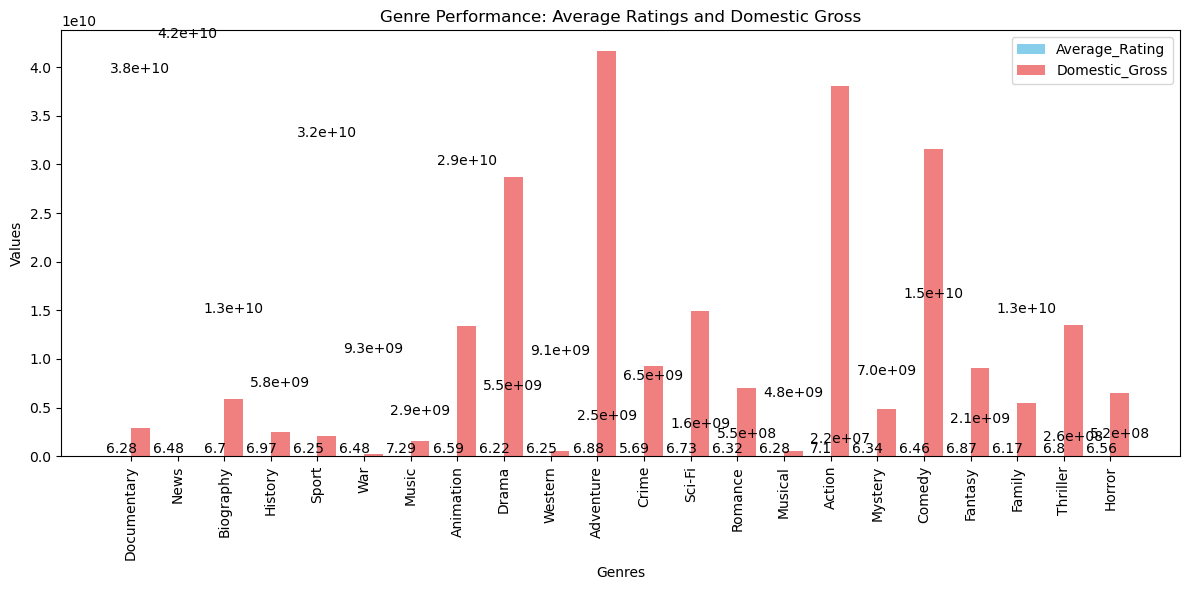

In [29]:
Average_Rating = genre_stats['averagerating']
Domestic_Gross = genre_stats['domestic_gross']
genres = genre_stats['genres']
# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
index = range(len(genres))

plt.bar(index, Average_Rating, bar_width, label='Average_Rating', color='skyblue')
plt.bar([i + bar_width for i in index], Domestic_Gross, bar_width, label='Domestic_Gross', color='lightcoral')

plt.xlabel('Genres')
plt.ylabel('Values')
plt.title('Genre Performance: Average Ratings and Domestic Gross')
plt.xticks([i + bar_width / 2 for i in index], genres, rotation=90)
plt.legend()

# Add labels to the bars
for i in index:
    plt.text(i, Average_Rating[i] + 0.1, round(Average_Rating[i], 2), ha='center', va='bottom')
    plt.text(i + bar_width, Domestic_Gross[i] + 0.1e+10, '{:.1e}'.format(Domestic_Gross[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()







####  The correlation matrix

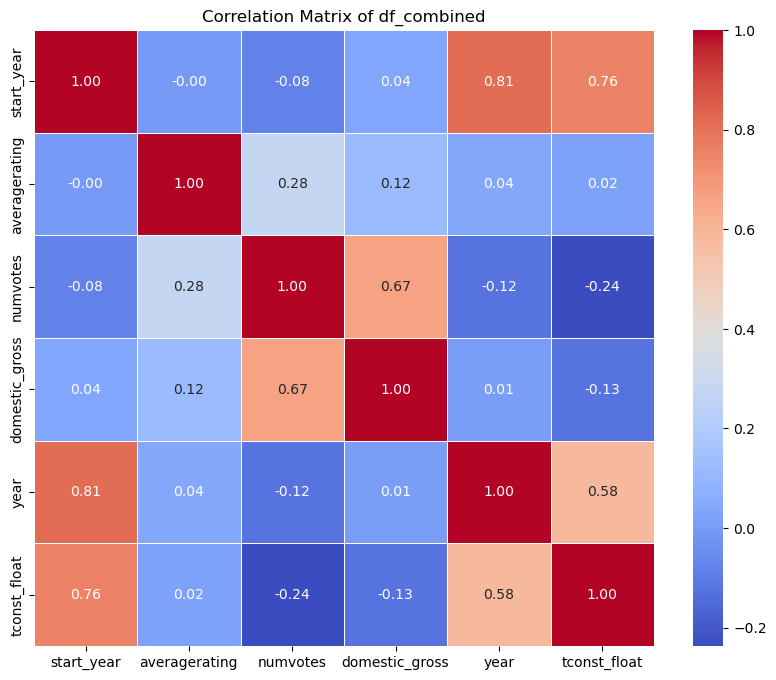

In [30]:

# Exclude non-numeric columns, such as 'tconst'
numerical_columns = df_combined.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of df_combined")
plt.show()


####  The corelation beween `tconst_float` and `avarage rating`

[Text(0.5, 1.0, 'tconst_float vs avarage rating correlation')]

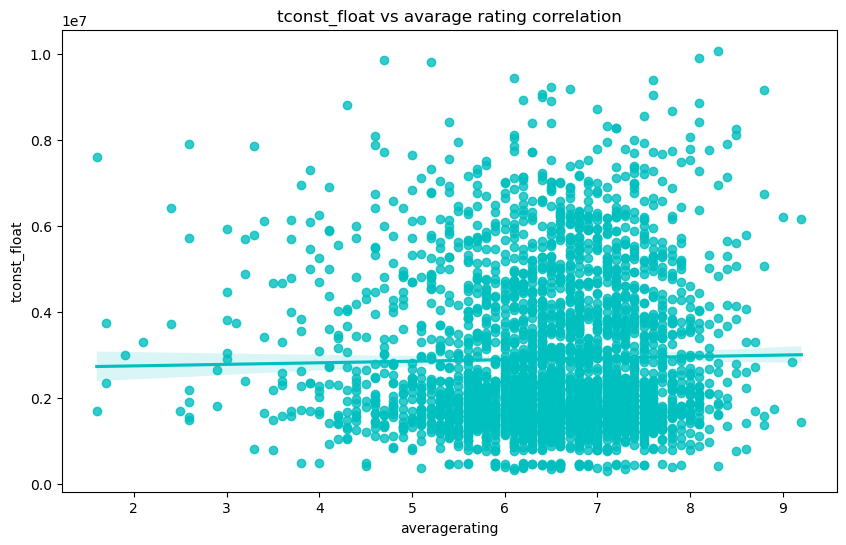

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(data = df_combined, y = "tconst_float", x = "averagerating", color = "c").set(title = "tconst_float vs avarage rating correlation" )


####  The corelation beween `domestic_gross` and `avarage rating`

[Text(0.5, 1.0, 'averagerating vs domestic_gross correlation')]

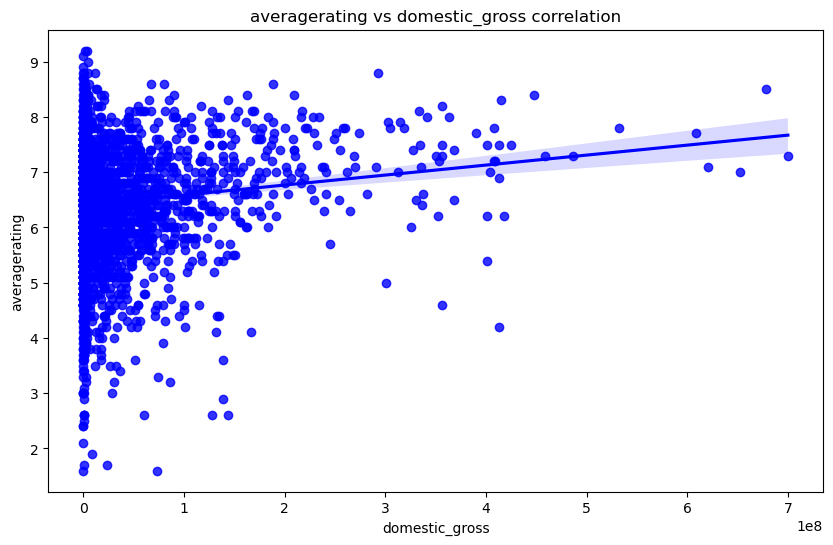

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(data = df_combined, y = "averagerating", x = "domestic_gross", color = "b").set(title = "averagerating vs domestic_gross correlation" )


#### Histogram 

In [33]:
# Extract the years from the 'start_year' column and store them in a new column 'release_year'
df_combined['release_year'] = df_combined['start_year'].apply(lambda x: int(x))

# Display the DataFrame with the new 'release_year' column
year = (df_combined['start_year'])


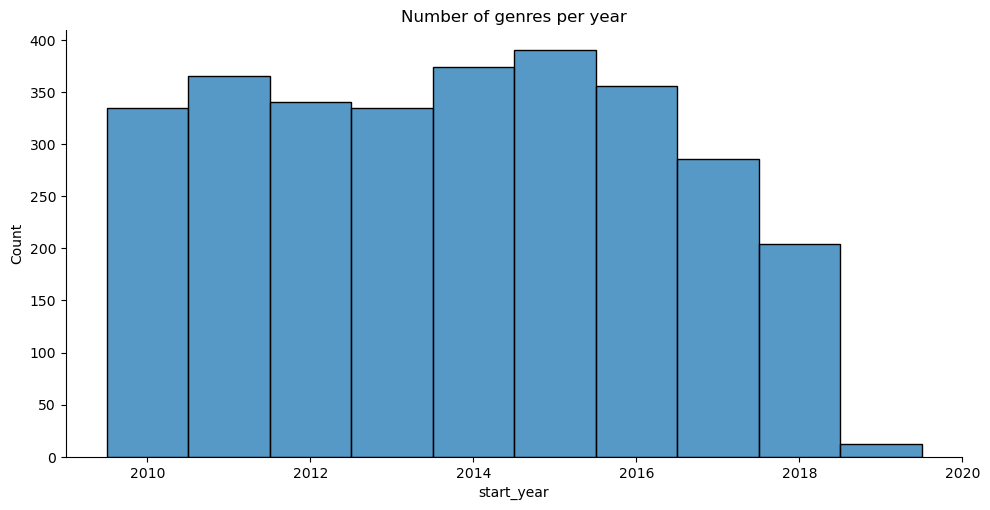

In [34]:
# a histogram comparing years and genres 
sns.displot(year, discrete = True, aspect=2, height=5, kind="hist").set(title= "Number of genres per year")

#### plot showing  `Genres popularity` and `Financial Success`

[Text(0.5, 1.0, 'Most popular Genre')]

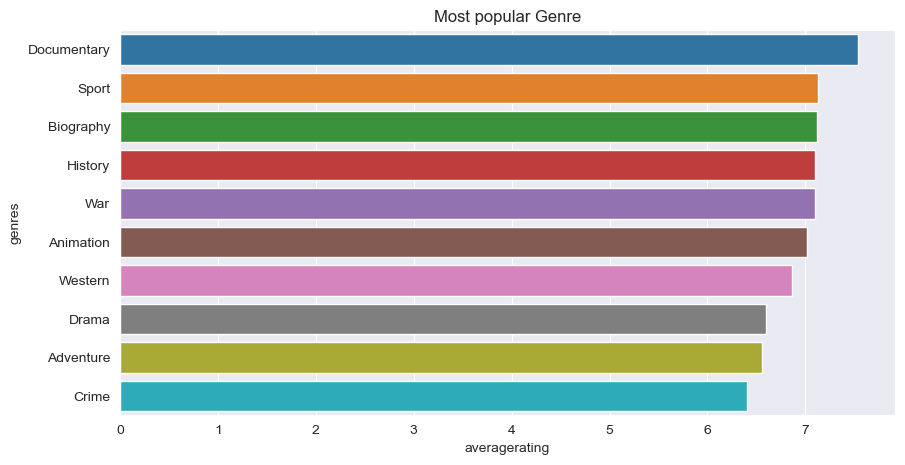

In [35]:
genres = genre_stats['genres']
# Filter the DataFrame to select genres with high domestic gross
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
popular = yearly_genre_stats.sort_values(by=['start_year', 'averagerating'], ascending=[True, False]).head(10)
sns.barplot(y='genres', x='averagerating', data = popular).set(title= "Most popular Genre")

In [ ]:
genres = genre_stats['genres']
# Filter the DataFrame to select genres with high domestic gross
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
financial_sucessful = yearly_genre_stats.sort_values(by=['start_year', 'domestic_gross'], ascending=[True, False]).head(10)
sns.barplot(y='genres', x='domestic_gross', data = financial_sucessful).set(title= "Genres With the highest domestic gross")

[Text(0.5, 1.0, 'Genres With the highest domestic gross')]

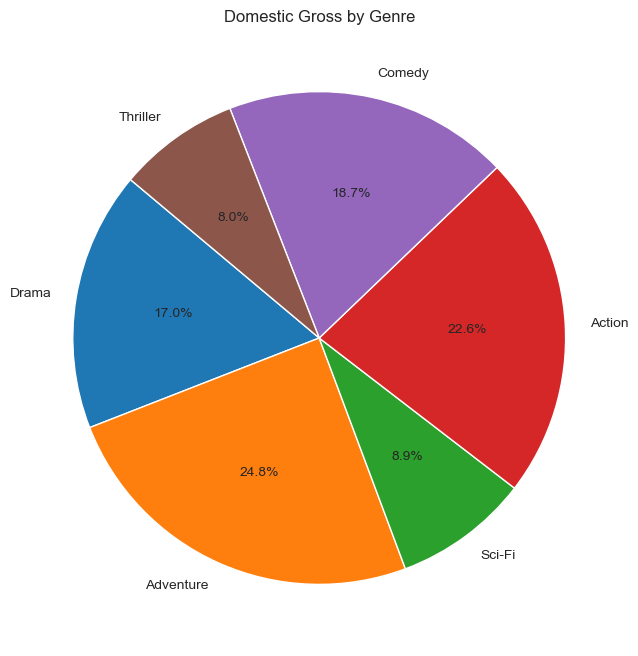

In [37]:
# Data to be plotted
genres = high_rated_high_gross_genres['genres']
domestic_gross = high_rated_high_gross_genres['domestic_gross']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(domestic_gross, labels=genres, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title("Domestic Gross by Genre")

# Display the pie chart
plt.show()